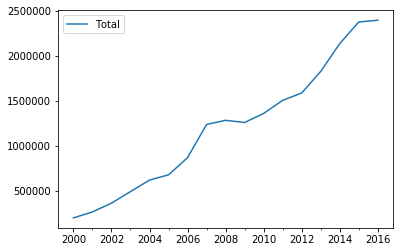

In [35]:
import pandas as pd
import statsmodels.api as sm
import scipy
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
df = pd.read_csv("C:\Users\Rawal Rawal\Desktop\Book1.csv")
df.index = pd.date_range(start='1950',periods=67, freq='Y')
del df['End of Fiscal']
df = df.tail(17)
df.plot()

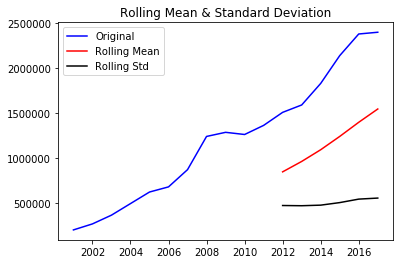

Results of Dickey-Fuller Test:
Test Statistic                 0.000000
p-value                        0.958532
#Lags Used                     8.000000
Number of Observations Used    8.000000
Critical Value (5%)           -3.367187
Critical Value (1%)           -4.665186
Critical Value (10%)          -2.802961
dtype: float64


In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    timeseries1 = timeseries.iloc[:,0].values
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries1, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
          dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

test_stationarity(df)

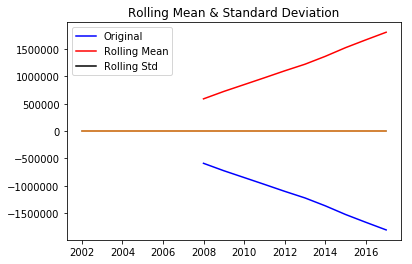

Results of Dickey-Fuller Test:
Test Statistic                 1.875549
p-value                        0.998488
#Lags Used                     3.000000
Number of Observations Used    6.000000
Critical Value (5%)           -3.646238
Critical Value (1%)           -5.354256
Critical Value (10%)          -2.901198
dtype: float64


In [43]:
#stationarizing
df_log = np.log(df)
df_log1 = df_log - df_log.shift()
plt.plot(df_log1)
#de-trending
moving_avg = df.rolling(8).mean()
plt.plot(df_log1)
plt.plot(moving_avg, color='red')
df_log_moving_avg_diff = df_log1 - moving_avg
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff)